# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**

## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [231]:
# Install required packages
install.packages(c("DataExplorer", "rlang", "ggplot2", "dplyr", "caTools", "tidyverse", "randomForest", "tidymodels", "e1071", "nnet", "pROC", "naivebayes", "vip", "discrim", "caret"))

# Load packages
library("rlang")
library("DataExplorer")
library("ggplot2")
library("dplyr")
library("caTools")
library("tidyverse")
library("randomForest")
library("tidymodels")
library("e1071")
library("nnet")
library("pROC")
library("naivebayes")
library("vip")
library("discrim")
library("caret")

Installing rlang [1.1.0] ...
	OK [linked cache]
Installing ggplot2 [3.4.1] ...
	OK [linked cache]
Installing DataExplorer [0.8.2] ...
	OK [linked cache]
Installing dplyr [1.1.1] ...
	OK [linked cache]
Installing caTools [1.18.2] ...
	OK [linked cache]
Installing tidyverse [2.0.0] ...
	OK [linked cache]
Installing randomForest [4.7-1.1] ...
	OK [linked cache]
Installing nnet [7.3-18] ...
	OK [linked cache]
Installing tidymodels [1.0.0] ...
	OK [linked cache]
Installing e1071 [1.7-13] ...
	OK [linked cache]
Installing pROC [1.18.0] ...
	OK [linked cache]
Installing naivebayes [0.9.7] ...
	OK [linked cache]
Installing vip [0.3.2] ...
	OK [linked cache]
Installing discrim [1.0.1] ...
	OK [linked cache]
Installing caret [6.0-94] ...
	OK [linked cache]


In [233]:
recipe_data <- read.csv("recipe_site_traffic_2212.csv")

In [234]:
introduce(recipe_data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
947,8,3,5,0,581,535,7576,60416


Based on initial data validation of the recipe data, there are 947 rows and 8 columns in the dataset. There are no columns that have all missing values. However, there are 581 missing observations across the dataset. We also identified 535 complete rows, which is the number of rows that do not have any missing values. The total number of observations in the dataset is 7,576.

In [235]:
recipe_data

recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,NA,NA,NA,NA,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NA
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NA
6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
7,183.94,47.95,9.75,46.71,Chicken Breast,4,NA
8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NA
9,538.52,3.78,3.37,3.79,Pork,6,High


In [236]:
cat("Data types of columns in recipe_data:\n")
cat(paste0(names(recipe_data), ": ", sapply(recipe_data, class), "\n"))

Data types of columns in recipe_data:
recipe: integer
 calories: numeric
 carbohydrate: numeric
 sugar: numeric
 protein: numeric
 category: character
 servings: character
 high_traffic: character


In [237]:
if(!all(diff(sort(unique(recipe_data$recipe))) == 1)){
  stop("Recipe IDs are not continuous and/or unique")
}
# Print a message indicating that the data validation is complete
cat("Data validation complete. Recipe IDs are continuous and unique.\n")

Data validation complete. Recipe IDs are continuous and unique.


In [238]:
lapply(recipe_data[sapply(recipe_data, function(x) !is.numeric(x))], unique)

$category
 [1] "Pork"           "Potato"         "Breakfast"      "Beverages"     
 [5] "One Dish Meal"  "Chicken Breast" "Lunch/Snacks"   "Chicken"       
 [9] "Vegetable"      "Meat"           "Dessert"       

$servings
[1] "6"            "4"            "1"            "2"            "4 as a snack"
[6] "6 as a snack"

$high_traffic
[1] "High" NA

In [239]:

# use grepl to find the rows with "as a snack"
snack_rows <- grepl("as a snack", recipe_data$servings)

# subset the data frame to show only the rows with "as a snack"
snack_recipes <- recipe_data[snack_rows, ]

# print the resulting subset of data
snack_recipes

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
452,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
549,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
736,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,NA


In [240]:
# clean "as a snack" and change to integer
recipe_data$servings <- gsub(" as a snack", "", recipe_data$servings)
recipe_data$servings <- as.integer(recipe_data$servings)

# merge 'Chicken' and 'Chicken Breast' 
recipe_data$category <- gsub(" Breast", "", recipe_data$category)


In [241]:
# Convert high_traffic to a boolean column
recipe_data$high_traffic <- ifelse(is.na(recipe_data$high_traffic) | recipe_data$high_traffic == "FALSE", FALSE, TRUE)

In [242]:
recipe_data$category <- as.factor(recipe_data$category)

- "as a snack" entries cleaned up & changed to integer
- combined "Chicken" and "Chicken Breast" recipes into one category to use as reference for linear regression model later
- changed "high_traffic" a to boolean column, and set "High" and "null" values to "TRUE"/"FALSE"
- changed column "category" to a factor

## Missing Values in the Dataset

In [243]:
if (!all(is.numeric(recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)]) & recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)] >= 0) ||
    !all(is.numeric(recipe_data$sugar[!is.na(recipe_data$sugar)]) & recipe_data$sugar[!is.na(recipe_data$sugar)] >= 0) ||
    !all(is.numeric(recipe_data$protein[!is.na(recipe_data$protein)]) & recipe_data$protein[!is.na(recipe_data$protein)] >= 0) ||
    !all(is.numeric(recipe_data$calories[!is.na(recipe_data$calories)]) & recipe_data$calories[!is.na(recipe_data$calories)] >= 0)) {
  cat("The following non-numeric or negative values were found in the carbohydrate, sugar, and protein columns:\n")
  if (!all(is.numeric(recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)]) & recipe_data$carbohydrate[!is.na(recipe_data$carbohydrate)] >= 0)) {
    cat("carbohydrate: ")
    cat(recipe_data$carbohydrate[!is.numeric(recipe_data$carbohydrate) | recipe_data$carbohydrate < 0], sep = ", ")
    cat("\n")
  }
  if (!all(is.numeric(recipe_data$sugar[!is.na(recipe_data$sugar)]) & recipe_data$sugar[!is.na(recipe_data$sugar)] >= 0)) {
    cat("sugar: ")
    cat(recipe_data$sugar[!is.numeric(recipe_data$sugar) | recipe_data$sugar < 0], sep = ", ")
    cat("\n")
  }
  if (!all(is.numeric(recipe_data$protein[!is.na(recipe_data$protein)]) & recipe_data$protein[!is.na(recipe_data$protein)] >= 0)) {
    cat("protein: ")
    cat(recipe_data$protein[!is.numeric(recipe_data$protein) | recipe_data$protein < 0], sep = ", ")
    cat("\n")
  }
  if (!all(is.numeric(recipe_data$calories[!is.na(recipe_data$calories)]) & recipe_data$protein[!is.na(recipe_data$protein)] >= 0)) {
    cat("calories: ")
    cat(recipe_data$calories[!is.numeric(recipe_data$calories) | recipe_data$calories < 0], sep = ", ")
    cat("\n")
  }
} else {
  cat("All non-NA values in carbohydrate, sugar, protein and calories columns are numeric and positive.\n")
}

All non-NA values in carbohydrate, sugar, protein and calories columns are numeric and positive.


In [244]:
summary(recipe_data[, sapply(recipe_data, is.numeric)])

     recipe         calories        carbohydrate         sugar        
 Min.   :  1.0   Min.   :   0.14   Min.   :  0.030   Min.   :  0.010  
 1st Qu.:237.5   1st Qu.: 110.43   1st Qu.:  8.375   1st Qu.:  1.690  
 Median :474.0   Median : 288.55   Median : 21.480   Median :  4.550  
 Mean   :474.0   Mean   : 435.94   Mean   : 35.070   Mean   :  9.047  
 3rd Qu.:710.5   3rd Qu.: 597.65   3rd Qu.: 44.965   3rd Qu.:  9.800  
 Max.   :947.0   Max.   :3633.16   Max.   :530.420   Max.   :148.750  
                 NA's   :52        NA's   :52        NA's   :52       
    protein           servings    
 Min.   :  0.000   Min.   :1.000  
 1st Qu.:  3.195   1st Qu.:2.000  
 Median : 10.800   Median :4.000  
 Mean   : 24.149   Mean   :3.477  
 3rd Qu.: 30.200   3rd Qu.:4.000  
 Max.   :363.360   Max.   :6.000  
 NA's   :52                       

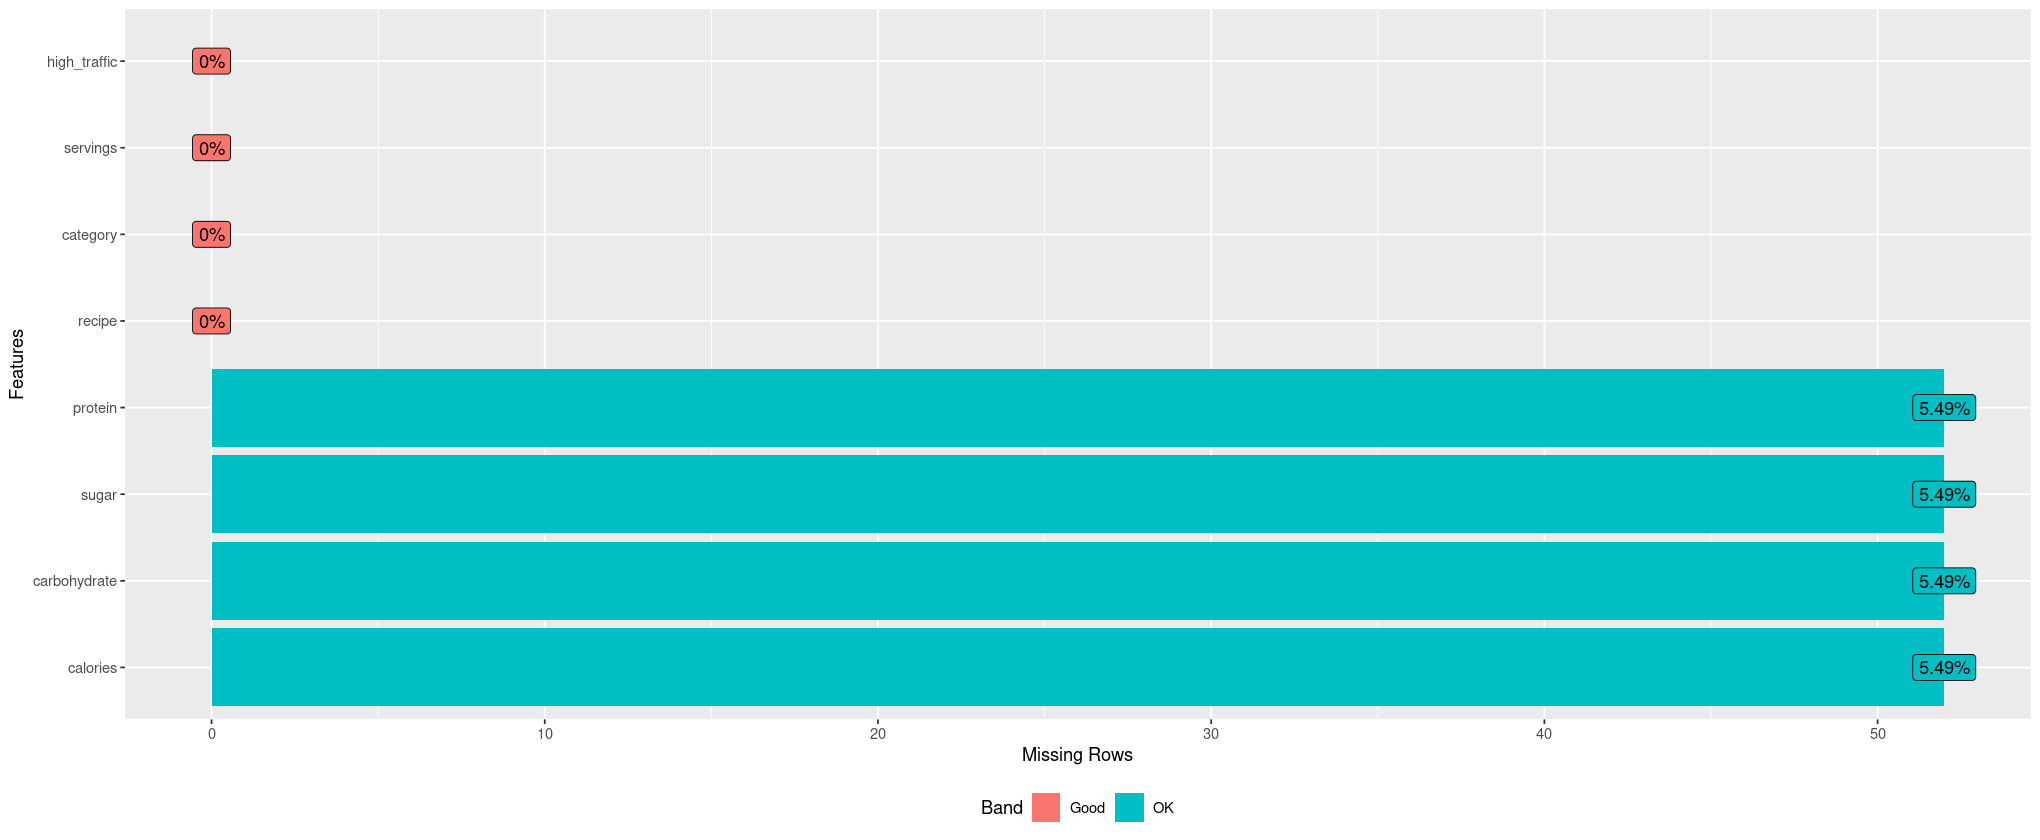

In [245]:
plot_missing(recipe_data)

In [246]:
# find rows with missing values
missing_rows <- which(rowSums(is.na(recipe_data)) > 0)

# create a data frame with missing rows
missing_data <- recipe_data[missing_rows, ]

# print the data frame
missing_data

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<lgl>
1,1,NA,NA,NA,NA,Pork,6,TRUE
24,24,NA,NA,NA,NA,Meat,2,FALSE
49,49,NA,NA,NA,NA,Chicken,4,FALSE
83,83,NA,NA,NA,NA,Meat,4,TRUE
90,90,NA,NA,NA,NA,Pork,6,TRUE
117,117,NA,NA,NA,NA,Chicken,6,TRUE
122,122,NA,NA,NA,NA,Dessert,2,TRUE
137,137,NA,NA,NA,NA,One Dish Meal,2,TRUE
150,150,NA,NA,NA,NA,Potato,2,TRUE


52 recipes in the dataset don't contain any information about their nutritional values (calories, carbohydrates, sugar, protein) - those rows will be deleted.

In [225]:
recipe_data <- recipe_data[-missing_rows, ]

# To summarize all the data validation and cleaning steps for each column:

- recipe Data validation complete. Recipe IDs are continuous and unique
- calories NA values replaced with the median of their respective columns within that category
- carbohydrate NA values replaced with the median of their respective columns within that category
- sugar NA values replaced with the median of their respective columns within that category
- protein NA values replaced with the median of their respective columns within that category
- category  column changed to a factor; categories left as:'Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast' 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert' (Chicken Breast & Chicken?)
- servings changed to integer, cleaned up entries containing "as a snack"
- high_traffic changed to boolean column; observations "High" and "NA" replaced with TRUE/FALSE 

In [226]:
introduce(recipe_data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
895,8,2,6,0,0,895,7160,46608


After data validation and cleaning, the dataset contains 895 rows and 8 columns. All rows are complete, resulting in a total of 7,160 observations.

### Exploratory Analysis

Warning message:
“Removed 208 rows containing non-finite values (`stat_qq()`).”
Warning message:
“Removed 208 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 208 rows containing non-finite values (`stat_boxplot()`).”


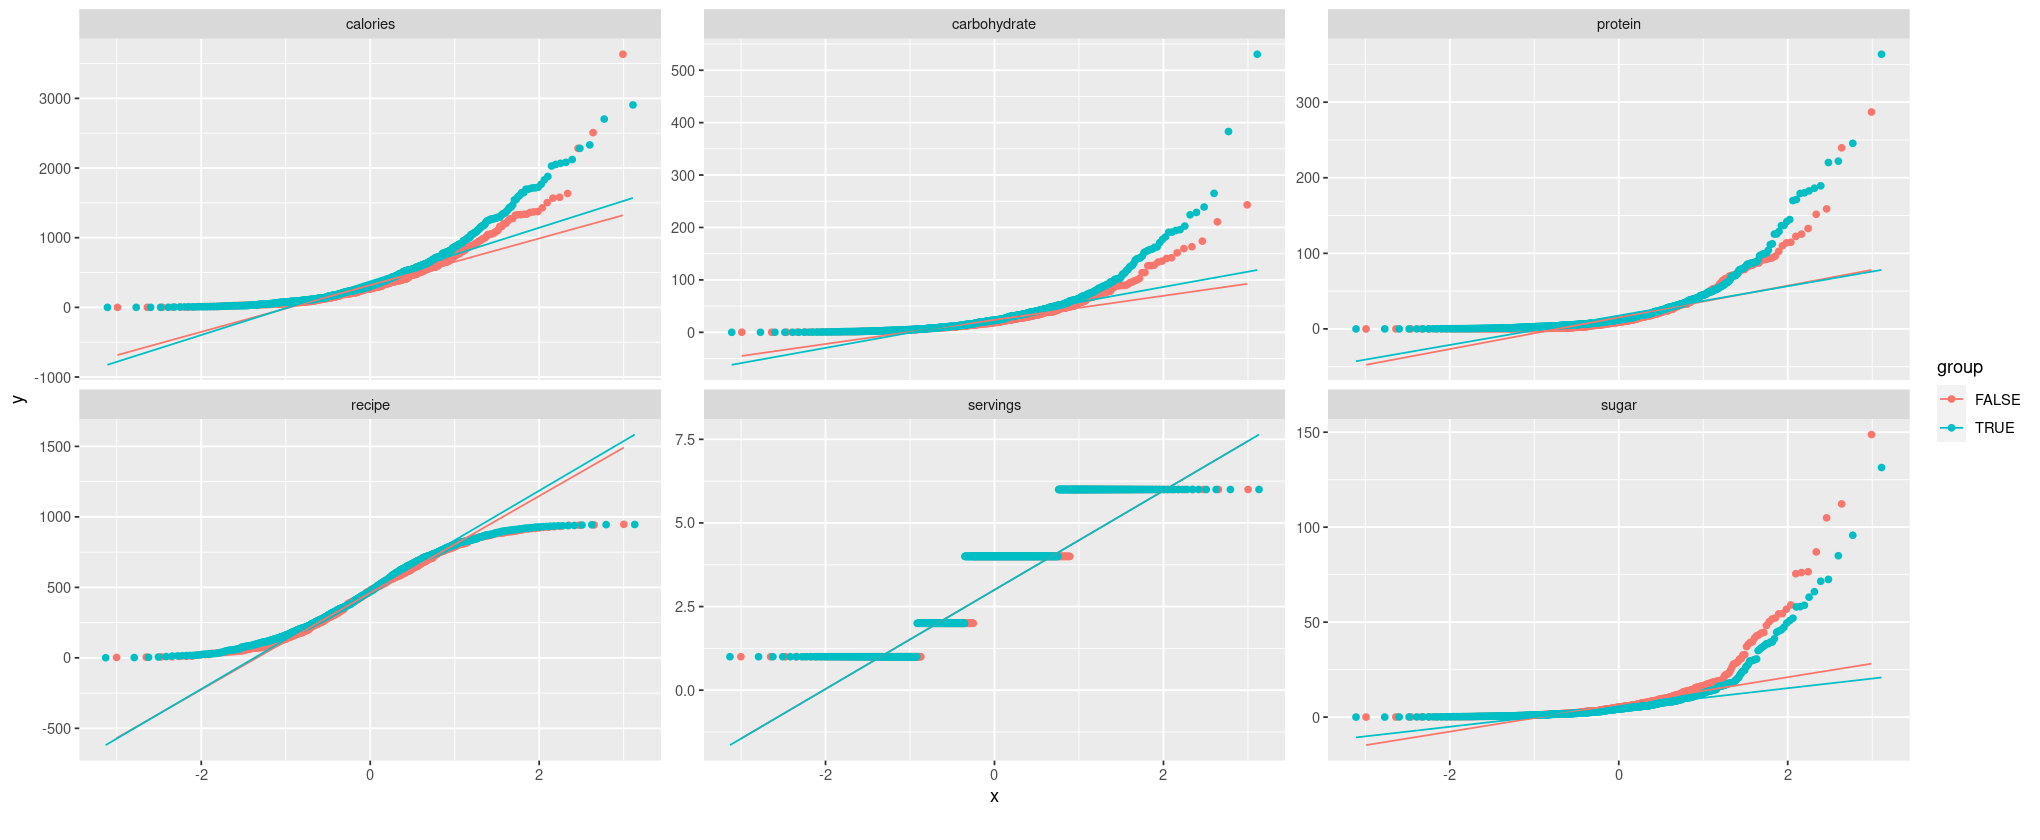

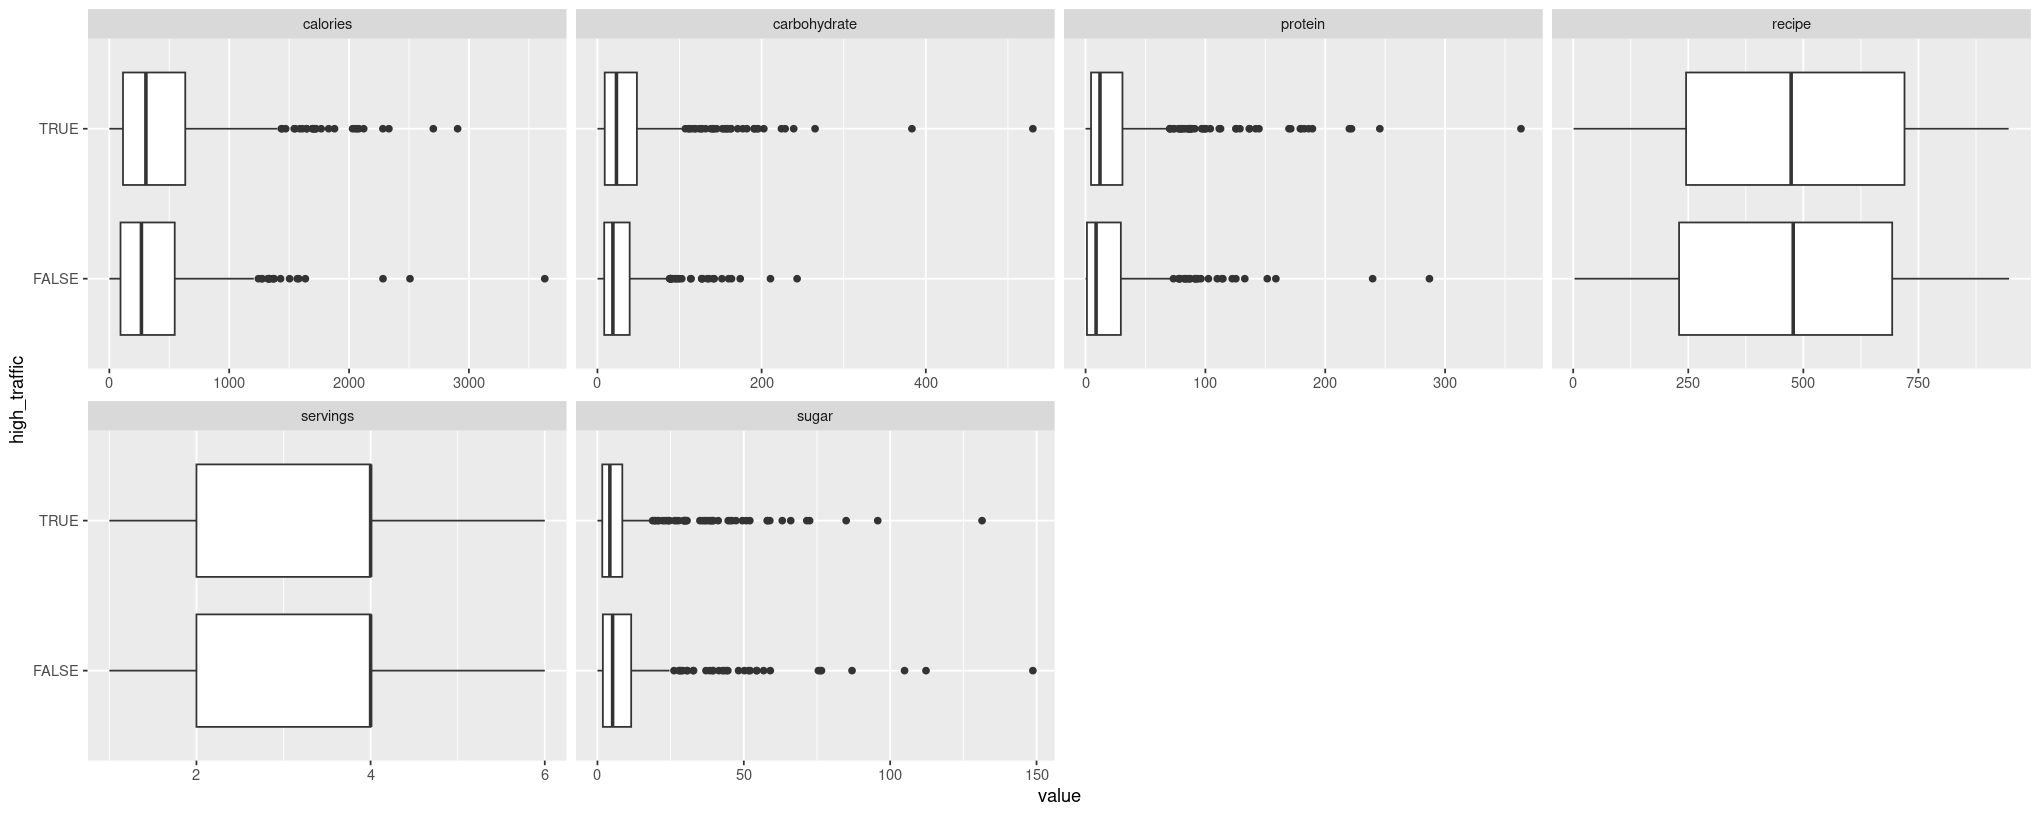

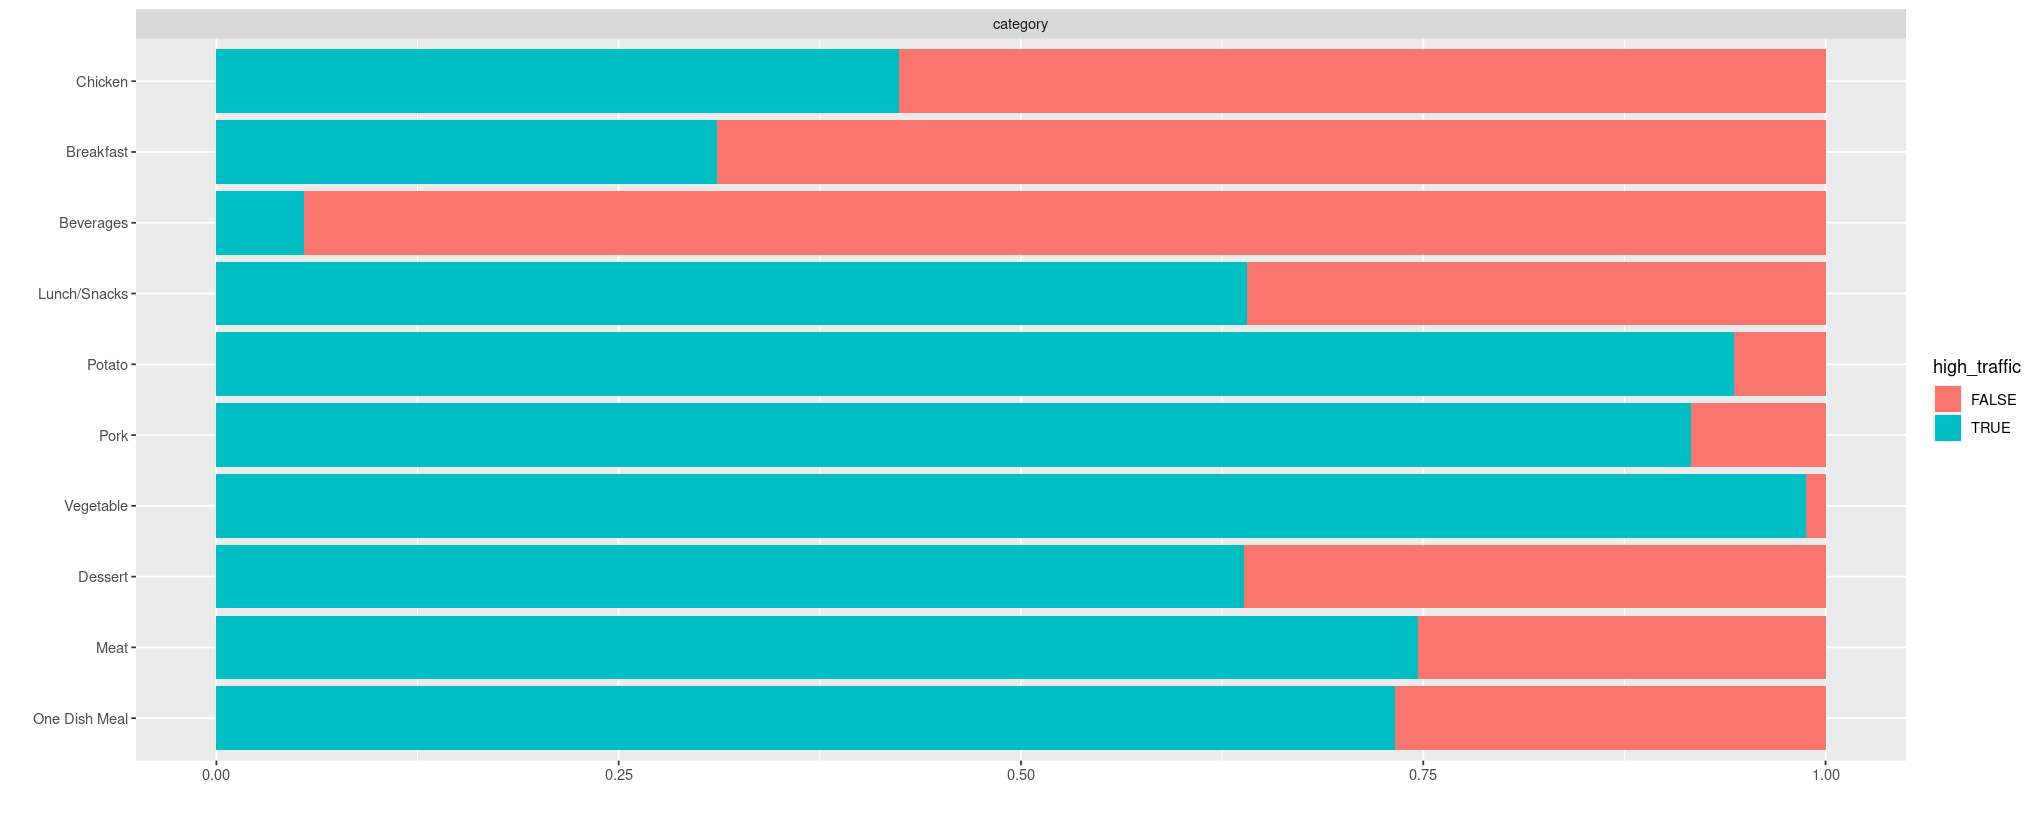

In [227]:
plot_qq(recipe_data, by = "high_traffic")
plot_boxplot(recipe_data, by = "high_traffic")
plot_bar(recipe_data, by = "high_traffic")

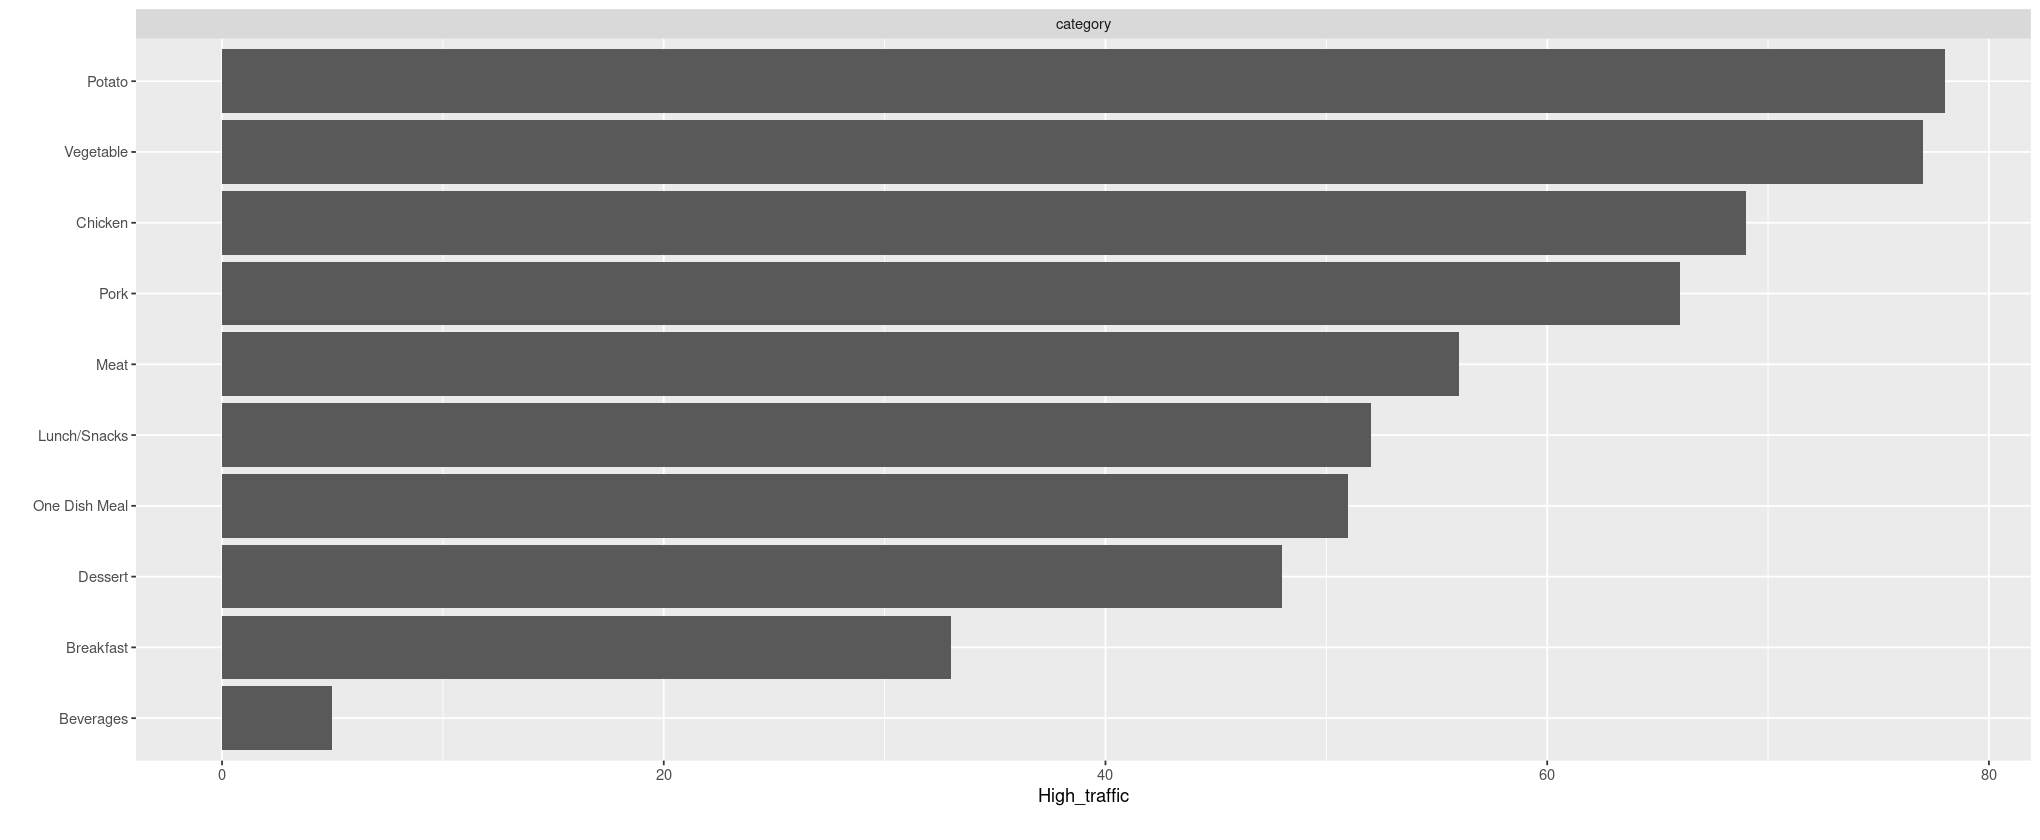

In [228]:
plot_bar(recipe_data,with = c("high_traffic"))

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


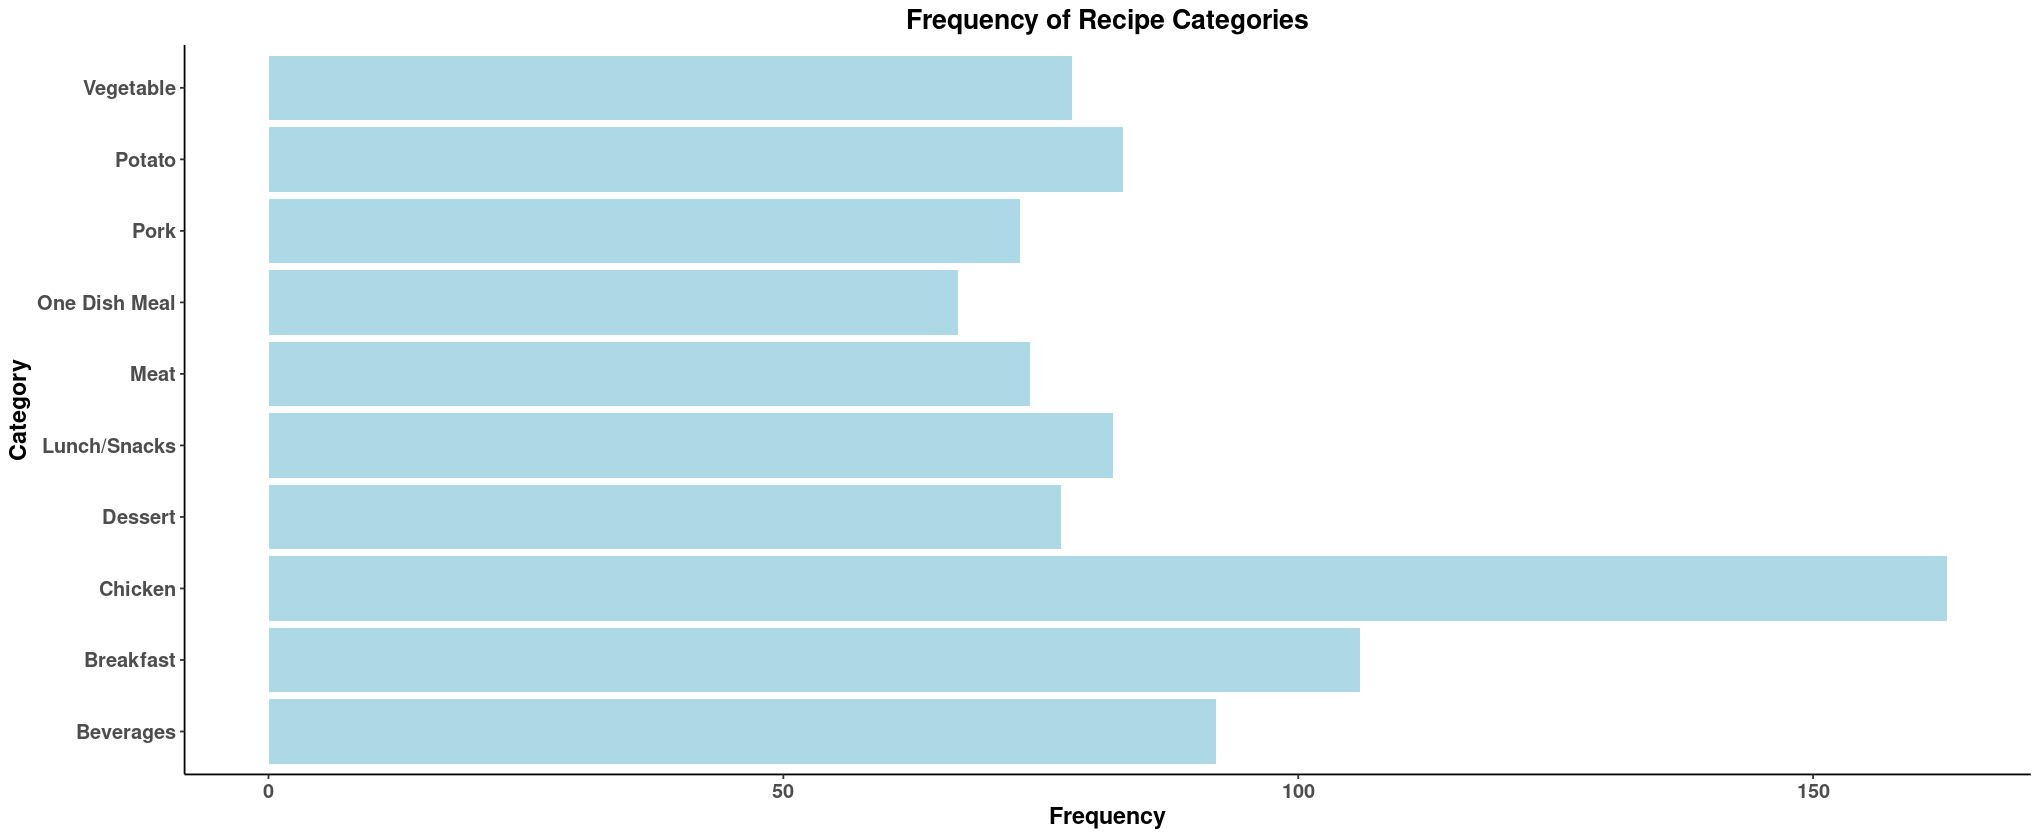

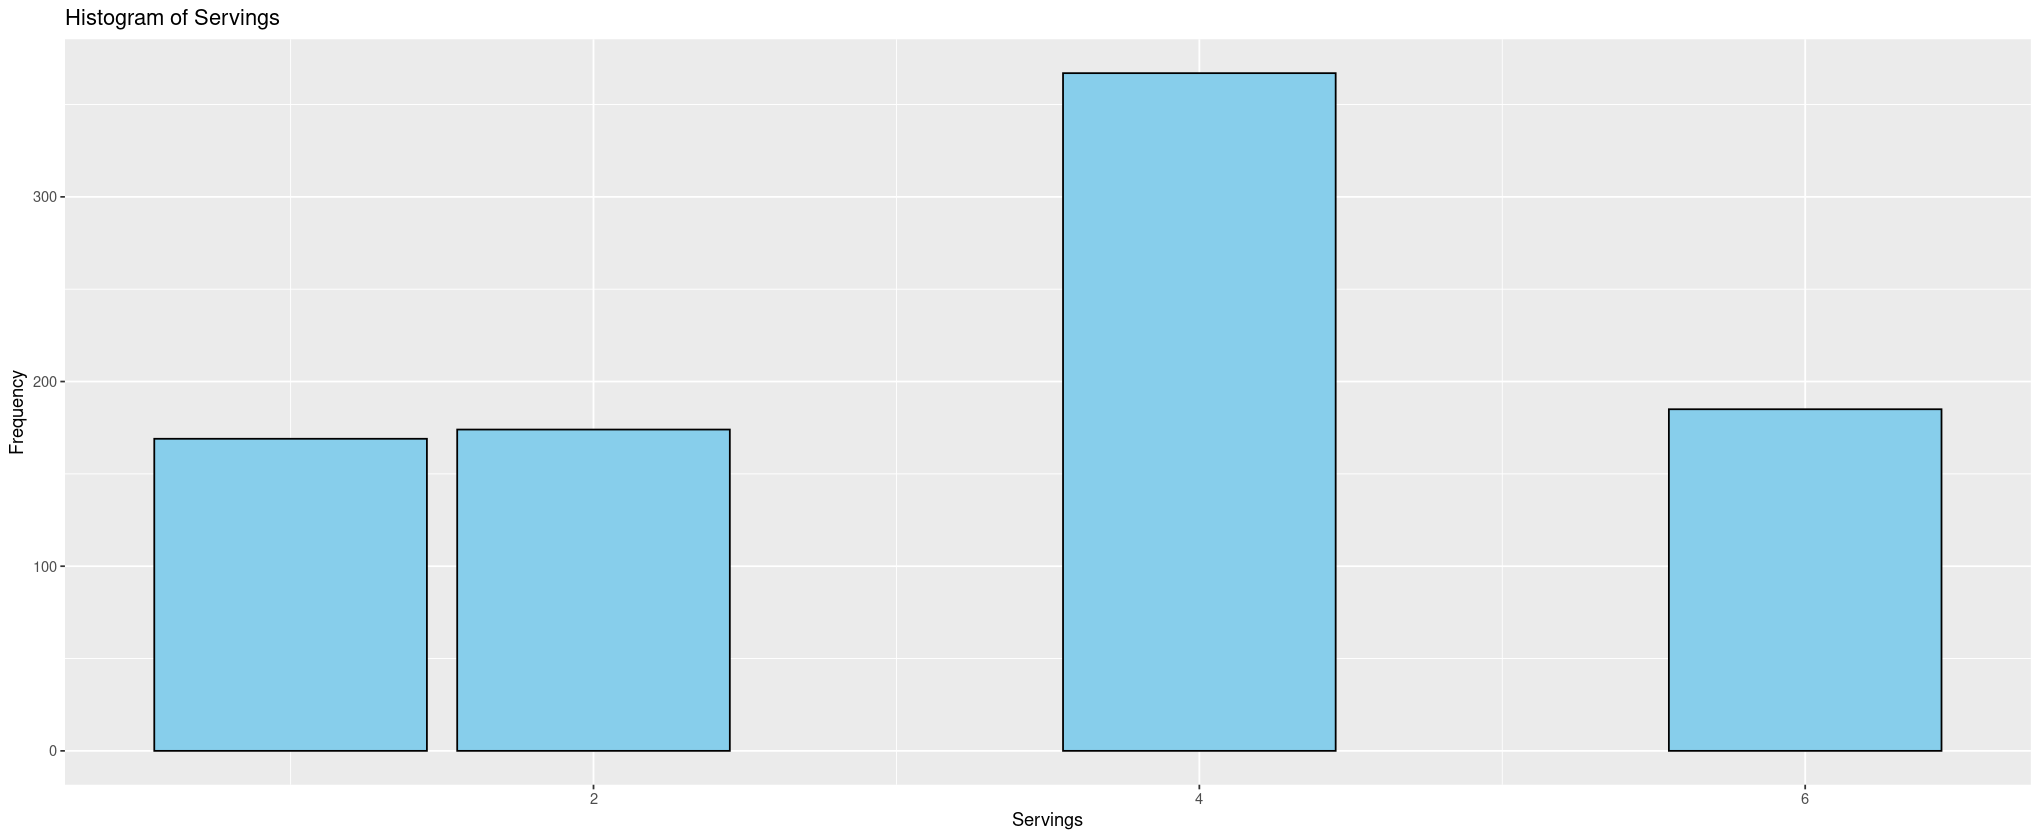

In [229]:
# Create a dataframe with the counts of each category
category_counts <- as.data.frame(table(recipe_data$category))

# Create the bar chart
ggplot(category_counts, aes(x=Freq, y=Var1)) +
  geom_bar(stat="identity", fill = "lightblue") +
  labs(title="Frequency of Recipe Categories", x="Frequency", y="Category") +
  theme(axis.text.x = element_text(face = "bold", size = 12),
        axis.text.y = element_text(face = "bold", size = 12),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        panel.background = element_rect(fill = "white"),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.line.x = element_line(colour = "black"),
        axis.line.y = element_line(colour = "black"),
        axis.title.x = element_text(face = "bold", size = 14),
        axis.title.y = element_text(face = "bold", size = 14))

ggplot(recipe_data, aes(x = servings)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histogram of Servings", x = "Servings", y = "Frequency")


In [265]:
# Split data into training and testing sets
set.seed(123)
recipe_split <- initial_split(recipe_data, prop = 0.6, strata = "high_traffic")
recipe_train <- training(recipe_split)
recipe_test <- testing(recipe_split)

# Define model specifications
logistic_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

nb_spec <- naive_Bayes() %>%
  set_engine("naivebayes") %>%
  set_mode("classification")

# Define recipe to pre-process data for modeling
recipe_recipe <- recipe(high_traffic ~ ., data = recipe_train) %>%
  step_log(calories, carbohydrate, sugar, protein) %>%
  step_dummy(category, servings)

# Convert high_traffic to a factor variable
recipe_train$high_traffic <- as.factor(recipe_train$high_traffic)
recipe_test$high_traffic <- as.factor(recipe_test$high_traffic)

# Fit models and evaluate performance on test set
tryCatch({
  logistic_fit <- logistic_spec %>%
    fit(high_traffic ~ ., data = recipe_train)
  logistic_predictions <- predict(logistic_fit, recipe_test) %>%
    bind_cols(recipe_test)
  logistic_metrics <- logistic_predictions %>%
    metrics(truth = high_traffic, estimate = .pred_class)
}, error = function(e) {
  print("Error in logistic regression model")
})

tryCatch({
  nb_fit <- nb_spec %>%
    fit(high_traffic ~ ., data = recipe_train)
  nb_predictions <- predict(nb_fit, recipe_test) %>%
    bind_cols(recipe_test)
  nb_metrics <- nb_predictions %>%
    metrics(truth = high_traffic, estimate = .pred_class)
}, error = function(e) {
  print("Error in naive Bayes model")
})

# Create confusion matrices to compare model accuracy
tryCatch({
  logistic_confusion <- logistic_predictions %>%
    conf_mat(truth = high_traffic, estimate = .pred_class)
}, error = function(e) {
  print("Error in creating confusion matrix for logistic regression model")
})

tryCatch({
  nb_confusion <- nb_predictions %>%
    conf_mat(truth = high_traffic, estimate = .pred_class)
}, error = function(e) {
  print("Error in creating confusion matrix for naive Bayes model")
})

# View performance metrics
logistic_metrics
nb_metrics

# View confusion matrices
logistic_confusion
nb_confusion


Warning message:
“naive_bayes(): Feature category - zero probabilities are present. Consider Laplace smoothing.”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7262570
kap,binary,0.4268444


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6973684
kap,binary,0.3430547


          Truth
Prediction FALSE TRUE
     FALSE    92   46
     TRUE     52  168

          Truth
Prediction FALSE TRUE
     FALSE    77   42
     TRUE     73  188

In [266]:
summary(log_model)
summary(nb_model)



Call:
glm(formula = high_traffic ~ ., family = binomial, data = recipe_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8353  -0.7774   0.2571   0.7465   2.6956  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -3.356e+00  7.796e-01  -4.305 1.67e-05 ***
recipe                 -5.728e-05  3.737e-04  -0.153 0.878171    
calories                3.121e-04  2.264e-04   1.378 0.168074    
carbohydrate           -1.251e-04  2.695e-03  -0.046 0.962973    
sugar                  -8.575e-03  7.990e-03  -1.073 0.283191    
protein                -5.008e-04  2.872e-03  -0.174 0.861573    
categoryBreakfast       2.275e+00  7.672e-01   2.965 0.003025 ** 
categoryChicken         2.898e+00  7.925e-01   3.657 0.000255 ***
categoryChicken Breast  3.166e+00  7.829e-01   4.043 5.27e-05 ***
categoryDessert         4.112e+00  8.134e-01   5.055 4.30e-07 ***
categoryLunch/Snacks    3.751e+00  7.738e-01   4.848 1.25e-06 ***


          Length Class  Mode     
apriori   2      table  numeric  
tables    7      -none- list     
levels    2      -none- character
isnumeric 7      -none- logical  
call      4      -none- call     

The output is from a generalized linear model (GLM) that predicts high traffic on a recipe website based on various recipe characteristics. The model uses binary logistic regression, with high traffic being the binary response variable.

The deviance residuals indicate the difference between the observed and predicted values of the response variable. The coefficients in the output represent the effect of each predictor variable on the log odds of high traffic. A positive coefficient indicates that the predictor increases the log odds of high traffic, while a negative coefficient indicates that the predictor decreases the log odds of high traffic.

The intercept of the model is -3.356, which represents the log odds of high traffic when all predictor variables are zero. The predictor variables with significant coefficients (p < 0.05) are categoryBreakfast, categoryChicken, categoryChicken Breast, categoryDessert, categoryLunch/Snacks, categoryMeat, categoryOne Dish Meal, categoryPork, categoryPotato, and categoryVegetable. These categories are all positively associated with high traffic. The predictor variables with non-significant coefficients (p > 0.05) are recipe, calories, carbohydrate, sugar, protein, and servings. These variables do not have a significant effect on high traffic.

The null deviance represents the deviance when only the intercept is included in the model, while the residual deviance represents the deviance when the predictor variables are included in the model. The AIC (Akaike Information Criterion) measures the quality of the model, with lower values indicating a better fit. In this case, the AIC is 610.88, which suggests that the model has a good fit.

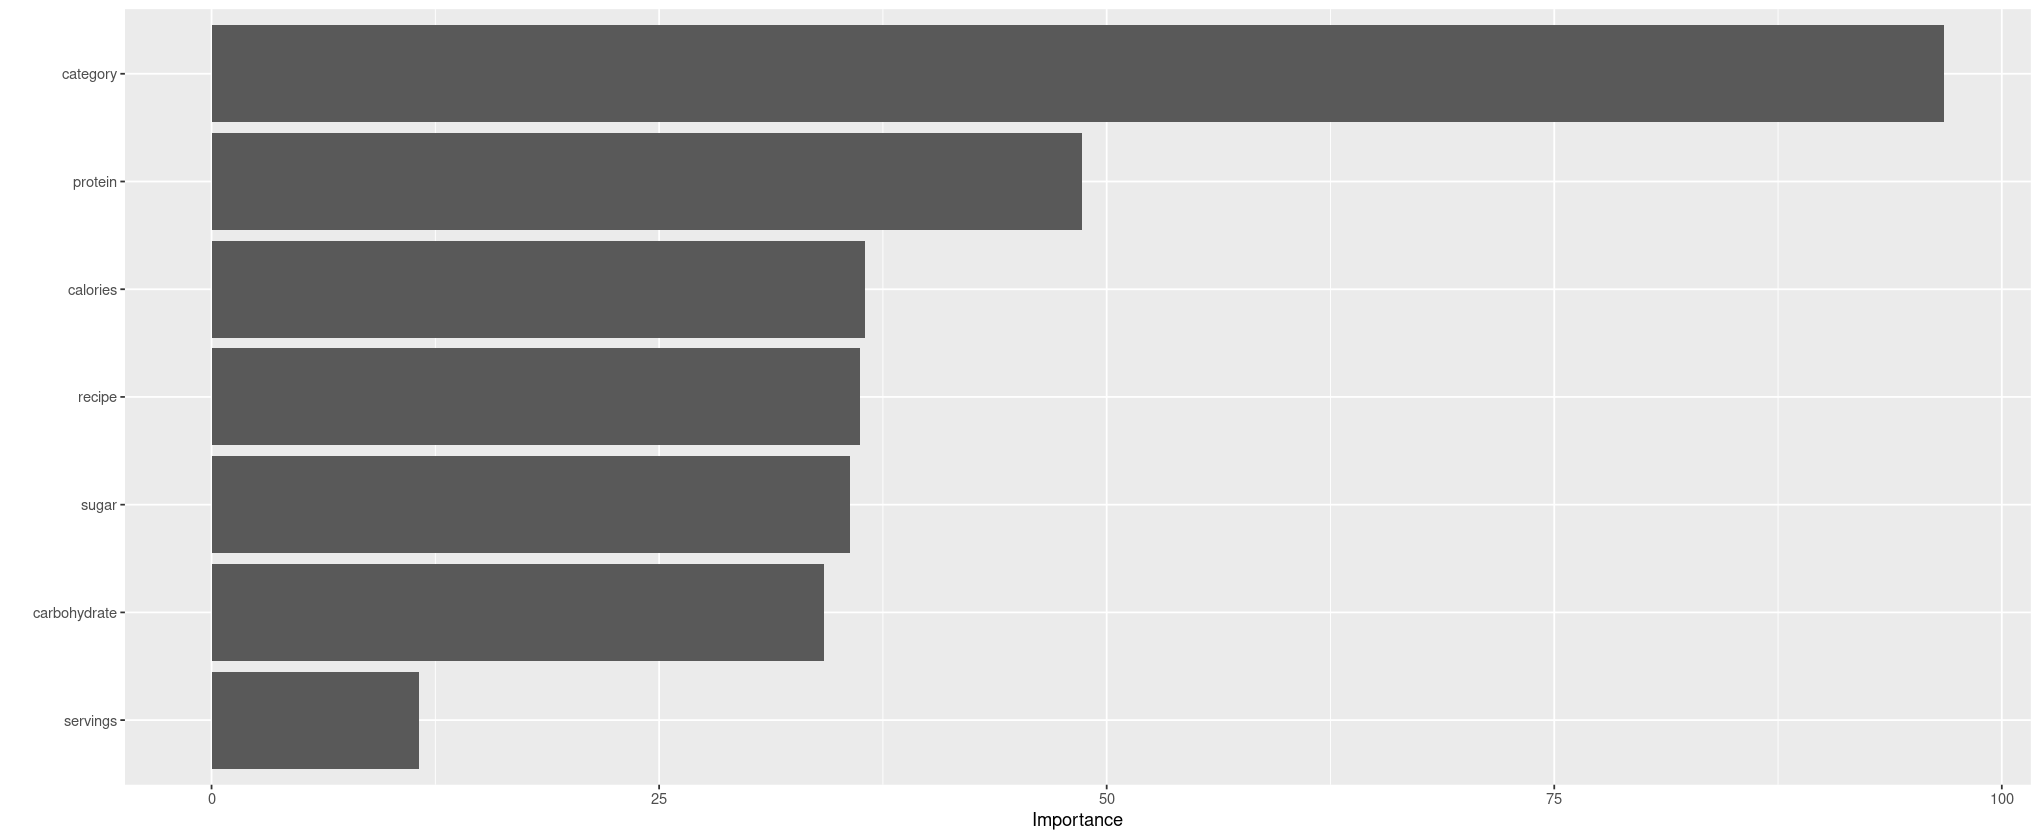

In [251]:
vip(rf_model)

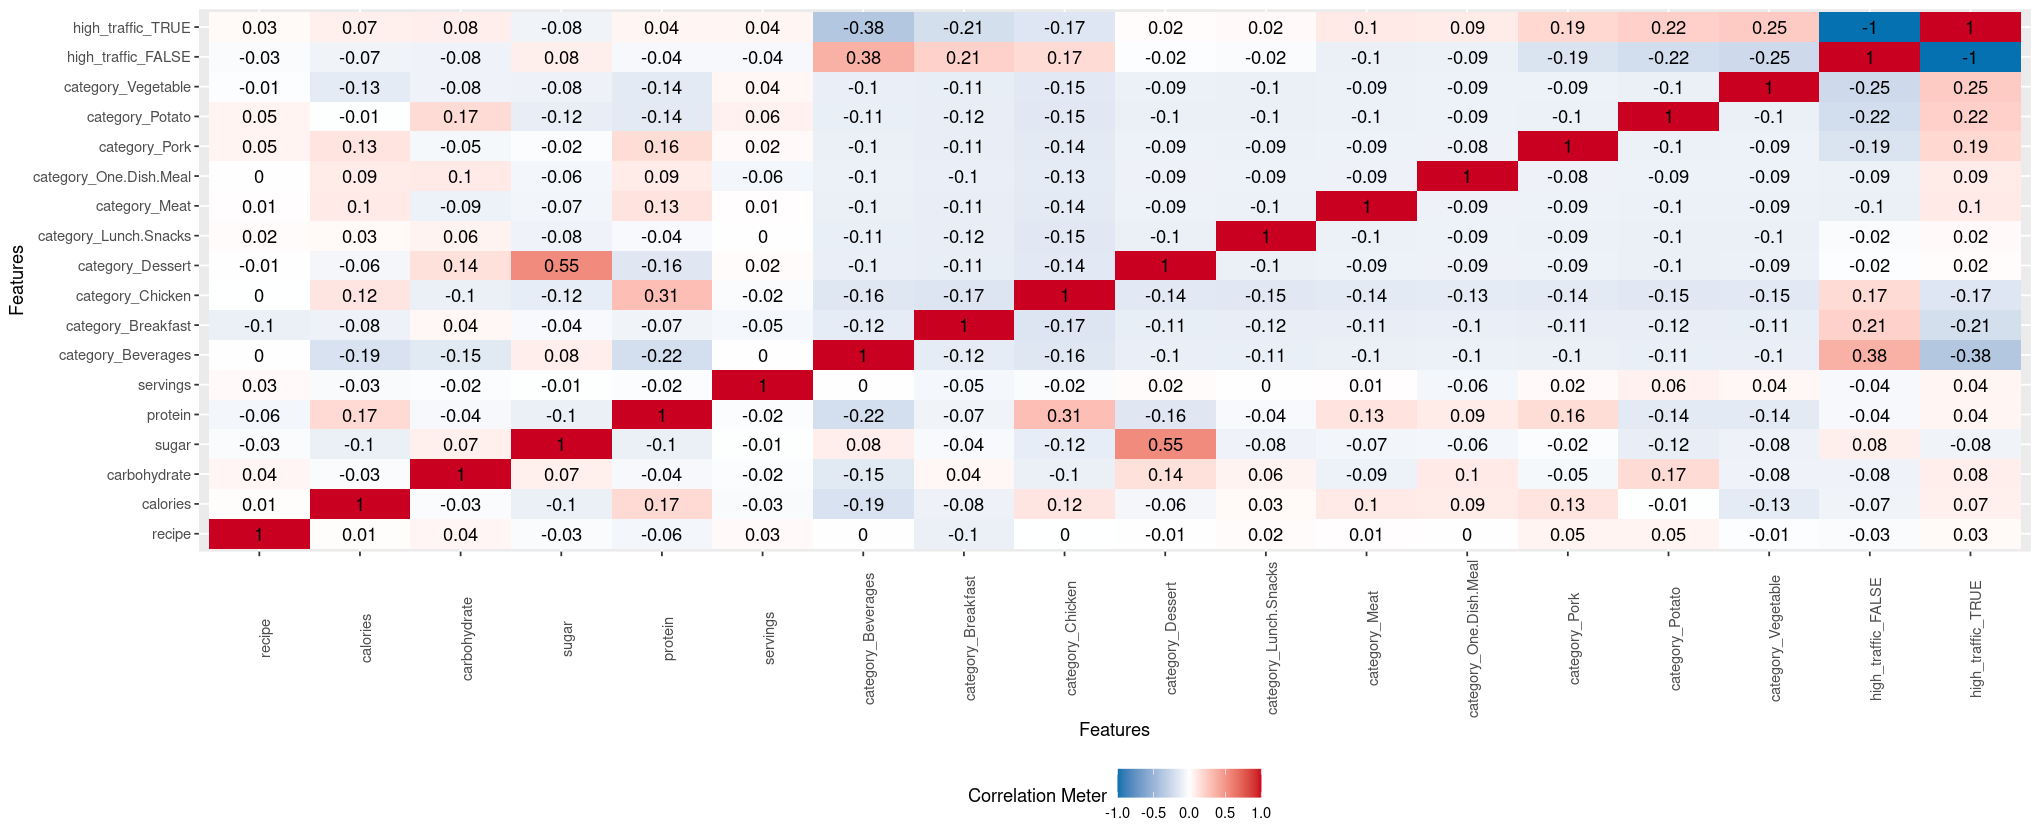

In [252]:
plot_correlation(na.omit(recipe_data), maxcat = 15L )

In [267]:
# Use the coefficients from the linear regression model to predict high traffic values for each category
recipe_data$category <- as.factor(recipe_data$category)
category_coef <- coef(lm_model)[-1] # exclude the intercept
category_high_traffic <- data.frame(category = names(category_coef), high_traffic = category_coef)

# Sort categories by predicted high traffic values
category_high_traffic <- category_high_traffic[order(category_high_traffic$high_traffic, decreasing = TRUE),]

# Display the top categories on the webpage
top_categories <- category_high_traffic$category[1:5]

cat("Top 5 categories by predicted high traffic values: ", top_categories)

recipe_data$category <- relevel(recipe_data$category, ref = "Chicken")

lm_model <- lm(high_traffic ~ category, data = recipe_data)
summary(lm_model)


Top 5 categories by predicted high traffic values:  categoryVegetable categoryPotato categoryPork categoryMeat categoryOne Dish Meal


Call:
lm(formula = high_traffic ~ category, data = recipe_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98795 -0.31132  0.05682  0.26761  0.94565 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.42442    0.03052  13.907  < 2e-16 ***
categoryBeverages     -0.37007    0.05170  -7.159 1.65e-12 ***
categoryBreakfast     -0.11310    0.04942  -2.288   0.0223 *  
categoryDessert        0.21414    0.05349   4.003 6.74e-05 ***
categoryLunch/Snacks   0.21603    0.05226   4.134 3.89e-05 ***
categoryMeat           0.32242    0.05440   5.927 4.33e-09 ***
categoryOne Dish Meal  0.30798    0.05646   5.455 6.27e-08 ***
categoryPork           0.49225    0.05328   9.240  < 2e-16 ***
categoryPotato         0.51876    0.05246   9.889  < 2e-16 ***
categoryVegetable      0.56353    0.05349  10.535  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4002 on 937 degrees of freed

The output shows the results of a linear regression model used to predict high traffic values based on different recipe categories. According to the model, the top 5 categories that generate high traffic are Vegetable, Potato, Pork, Meat, and One Dish Meal. The model estimates that Vegetable recipes generate the highest traffic with an estimated coefficient of 0.56353, followed by Potato (0.51876), Pork (0.49225), Meat (0.32242), and One Dish Meal (0.30798).

On the other hand, the model estimates that Beverages are negatively correlated with high traffic, with an estimated coefficient of -0.37007. This suggests that Beverages do not generate as much traffic as the other recipe categories.

The coefficients of the model are all statistically significant, as evidenced by their very low p-values (all less than 0.001). The model has a multiple R-squared value of 0.3361, which means that the predictors (recipe categories) explain 33.61% of the variance in the high traffic values. The adjusted R-squared value is 0.3297, which takes into account the number of predictors in the model.

In terms of the order of recipe categories that generate high traffic, Vegetable recipes generate the highest traffic, followed by Potato, Pork, Meat, and One Dish Meal. Beverages are negatively correlated with high traffic, indicating that they do not generate much traffic compared to the other recipe categories.

In [204]:
# Generate predictions using the logistic regression model
recipe_predictions <- predict(logistic_model, newdata = recipe_data, type = "prob")

# Set a probability threshold for classification
threshold <- 0.5

# Create a new column in the dataset to indicate high traffic recipes
recipe_data$predicted_high_traffic <- ifelse(recipe_predictions > threshold, TRUE, FALSE)


In [291]:
accuracy_rate <- sum(binary_predictions == recipe_test$high_traffic) / nrow(recipe_test)
accuracy_rate

[1] NA

In [287]:
# Train the model
glm_model <- glm(high_traffic ~ ., data = recipe_train, family = binomial())

# Make predictions on the test data
predictions <- predict(glm_model, newdata = recipe_test, type = "response")

# Convert predicted probabilities to binary values
binary_predictions <- ifelse(predictions > 0.5, 1, 0)

# Calculate accuracy rate
accuracy_rate <- sum(binary_predictions == recipe_test$high_traffic) / nrow(recipe_test)

# Calculate AUC
library(pROC)
auc <- roc(recipe_test$high_traffic, predictions)$auc

# Convert predicted probabilities to binary values
binary_predictions <- ifelse(predictions > 0.5, 1, 0)

# Calculate precision and recall rates
tp <- sum(binary_predictions == 1 & recipe_test$high_traffic == 1)
fp <- sum(binary_predictions == 1 & recipe_test$high_traffic == 0)
fn <- sum(binary_predictions == 0 & recipe_test$high_traffic == 1)

precision <- tp / (tp + fp)
recall <- tp / (tp + fn)

# Print out the results
print(paste0("Accuracy rate: ", accuracy_rate))
print(paste0("AUC: ", auc))
print(paste0("Precision rate: ", precision))
print(paste0("Recall rate: ", recall))


Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



[1] "Accuracy rate: NA"
[1] "AUC: 0.793094496365524"
[1] "Precision rate: NaN"
[1] "Recall rate: NaN"


In [ ]:
# Assuming your predicted values are stored in a variable called "pred" and actual values are stored in a variable called "actual"
accuracy <- sum(pred_ == actual) / length(actual)


ERROR: Error in eval(expr, envir, enclos): object 'pred_' not found


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation